In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm
from pathlib import Path
path_noto = Path('../fonts/NotoSansCJKkr-Regular.otf')

from matplotlib import font_manager
# font_manager.fontManager.addfont(path_noto)
plt.rc('font', family='Malgun Gothic')

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
colors = sns.color_palette('pastel')[0:7]


Text(0, 0.5, '만족도')

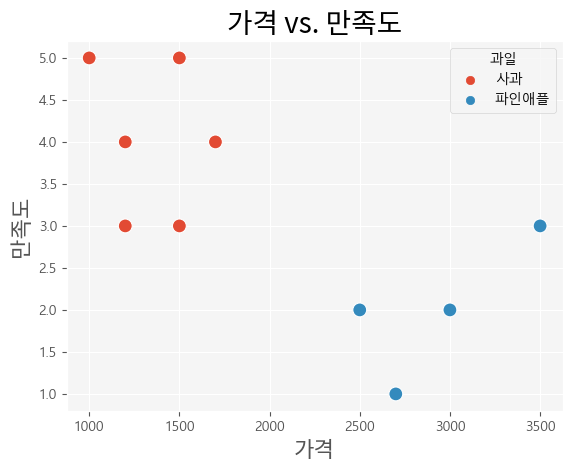

In [2]:
df = pd.DataFrame({
    '구매일자': ['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-10'],
    '과일': ['사과', '사과', '사과', '파인애플', '파인애플', '사과', '파인애플', '파인애플', '사과', '사과'],
    '만족도': [3, 5, 4, 1, 2, 4, 3, 2, 5, 3],
    '가격': [1500, 1000, 1200, 2700, 3000, 1700, 3500, 2500, 1500, 1200]
})
# df.groupby('과일')['가격'].mean()

sns.scatterplot(data=df, x='가격', y='만족도', hue='과일', s=100)
plt.title("가격 vs. 만족도", font=path_noto, fontsize=20)
plt.xlabel("가격", font=path_noto, fontsize=16)
plt.ylabel("만족도", font=path_noto, fontsize=16)

<AxesSubplot: xlabel='종류', ylabel='발매연도'>

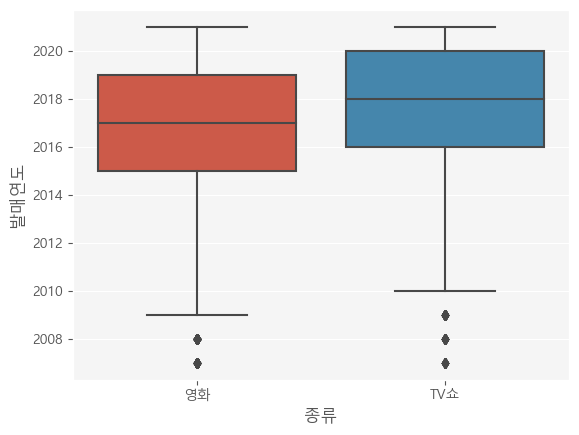

In [61]:
# outlier 제거
df2 = pd.read_csv('../netflix/netflix_short.csv')
df2 = df2[(np.abs(stats.zscore(df2['발매연도'])) < 3)]
sns.boxplot(data=df2, x='종류', y='발매연도')


In [122]:
df3 = pd.read_csv('./CO2_Emissions.csv')
df3_dropped = df3.drop(df3.columns[[0, 32, 33, 34]], axis=1)
df3_dropped.iloc[0, 0] = 'Country'
df3_dropped.columns = df3_dropped.iloc[0]
new_df = df3_dropped.drop([0]).reset_index().drop(columns=['index', 'Latest Year'])
col_to_move = new_df.pop('Country')
new_df.insert(10, 'Country', col_to_move)
# new_df[new_df['Country'] == 'United States of America'].iloc[:, [0, 29]]
real_df = new_df.iloc[:, 10:].replace('...', np.NaN)
top6 = real_df.iloc[[34, 76, 84, 137, 140, 181], :].replace(',', '', regex=True)
top6.iloc[:, 1:] = top6.iloc[:, 1:].astype(float) / 1000 # 단위 : 100만 톤
top6.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
34,China,NaN,NaN,NaN,NaN,NaN,6381.00000,NaN,NaN,NaN,NaN,8707.37600,NaN,9893.25700,NaN,10274.85100,NaN,NaN,NaN,NaN
76,India,1024.77286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1574.36216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Japan,1264.84426,1250.21105,1279.45296,1287.64218,1282.87208,1290.05628,1266.82861,1302.52428,1231.90952,1162.64787,1214.06856,1264.15513,1305.43285,1314.70300,1263.04994,1222.78131,1203.16702,1187.66145,1135.68800
137,Republic of Korea,441.63344,456.99688,475.80524,484.16327,490.19751,494.46419,501.10718,522.78761,536.42471,541.39688,594.69722,624.25653,627.21962,636.39756,629.71521,634.48723,637.59956,NaN,NaN
140,Russian Federation,1471.05223,1507.50088,1495.48358,1525.38995,1530.47362,1547.37578,1606.31336,1604.32381,1636.69437,1528.76492,1612.88481,1664.95315,1679.86620,1619.17289,1622.34891,1622.86101,1618.30426,1646.17981,1691.36043


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018')])

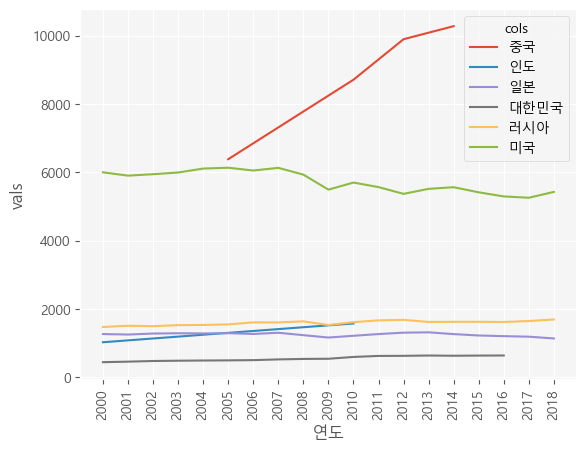

In [182]:
# top6_tidy = top6.melt('Country', var_name='cols', value_name='vals')

# sns.lineplot(data=top6_tidy, x="Country", y="vals", hue="cols")

top6_t = top6.T
top6_t.columns = top6_t.iloc[0]
top6_t = top6_t.iloc[1:, :]
top6_t = top6_t.reset_index(level=0)
top6_t = top6_t.rename(columns={0: "Year"})
top6_t = top6_t.rename_axis(None, axis=1)
# top6_t.head()

top6_t.columns = ["연도", "중국", "인도", "일본", "대한민국", "러시아", "미국"]

top6_tidy = top6_t.melt('연도', var_name='cols', value_name='vals')
# top6_tidy.head(20)
sns.lineplot(data=top6_tidy, x='연도', y="vals", hue="cols")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '00-02시'),
  Text(1, 0, '02-04시'),
  Text(2, 0, '04-06시'),
  Text(3, 0, '06-08시'),
  Text(4, 0, '08-10시'),
  Text(5, 0, '10-12시'),
  Text(6, 0, '12-14시'),
  Text(7, 0, '14-16시'),
  Text(8, 0, '16-18시'),
  Text(9, 0, '18-20시'),
  Text(10, 0, '20-22시'),
  Text(11, 0, '22-24시')])

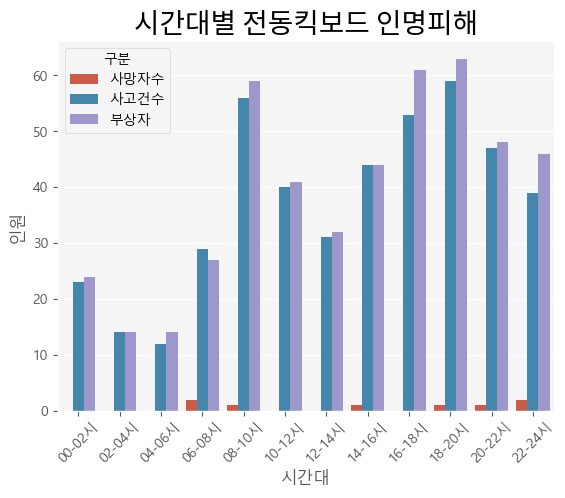

In [190]:
hourly = pd.DataFrame({
    '시간대': ['00-02시', '02-04시', '04-06시', '06-08시', '08-10시', '10-12시', '12-14시', '14-16시', '16-18시', '18-20시', '20-22시', '22-24시'],
    '사망자수': [0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2],
    '사고건수': [23, 14, 12, 29, 56, 40, 31, 44, 53, 59, 47, 39],
    '부상자': [24, 14, 14, 27, 59, 41, 32, 44, 61, 63, 48, 46]
})
h_tidy = hourly.melt('시간대', var_name='구분', value_name='인원')

sns.barplot(data=h_tidy, x='시간대', y='인원', hue='구분')
plt.title("시간대별 전동킥보드 인명피해", font=path_noto, fontsize=20)
plt.xticks(rotation=45)